<a href="https://colab.research.google.com/github/brranitha/ML-Models/blob/main/Palmer_Penguin_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
penguin_data = pd.read_csv('/content/Penguins Dataset.csv')
print(penguin_data.info())
print(penguin_data.describe())
print(penguin_data.columns)
print(penguin_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None
            rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.00000

In [3]:
penguin_data.head(12)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [4]:
penguin_data.isnull().sum()

,0
rowid,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [5]:
penguin_data.dropna(how='any',axis=0,inplace=True)

In [6]:
penguin_data.shape

(333, 9)

In [7]:
#transform the object data using LabelEncoder
label_encoder = LabelEncoder()
for i in penguin_data.columns:
  if penguin_data[i].dtype == 'object':
    penguin_data[i]=label_encoder.fit_transform(penguin_data[i])

In [8]:
standard_scaler = StandardScaler()
numerical_features = penguin_data.select_dtypes(include=['float64'])
penguin_data[i]=standard_scaler.fit_transform(numerical_features)

In [9]:
penguin_data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,0,2,39.1,18.7,181.0,3750.0,1,-0.896042
1,2,0,2,39.5,17.4,186.0,3800.0,0,-0.822788
2,3,0,2,40.3,18.0,195.0,3250.0,0,-0.676280
4,5,0,2,36.7,19.3,193.0,3450.0,0,-1.335566
5,6,0,2,39.3,20.6,190.0,3650.0,1,-0.859415


<Axes: >

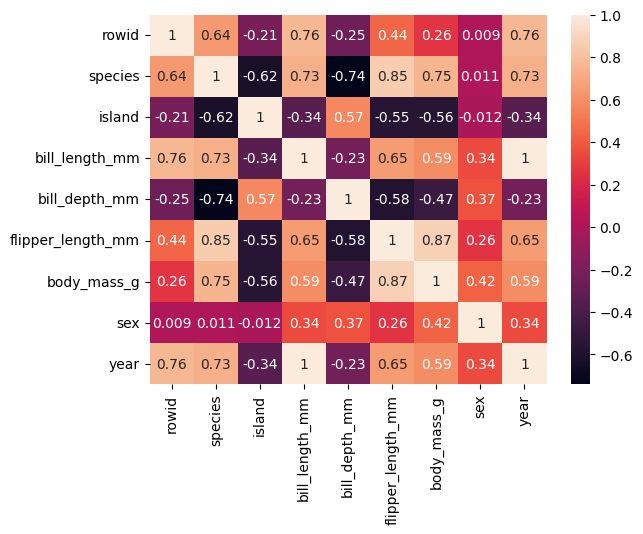

In [10]:
from typing_extensions import Annotated
sns.heatmap(penguin_data.corr(),annot=True)

In [11]:
penguin_data.drop(columns=['rowid','year'],inplace=True,axis=1)

In [12]:
penguin_data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [13]:
x = penguin_data.drop(columns=['species'])
y = penguin_data['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
randomForest = RandomForestClassifier(n_estimators = 100)
randomForest.fit(x_train,y_train)
y_predict=randomForest.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict,average='weighted')
recall = recall_score(y_test,y_predict,average='weighted')
f1 = f1_score(y_test,y_predict,average='weighted')

print('Accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_scoare',f1)

Accuracy 1.0
precision 1.0
recall 1.0
f1_scoare 1.0


In [16]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train,y_train)
y_predict=decisionTree.predict(x_test)

In [17]:
accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict,average='weighted')
recall = recall_score(y_test,y_predict,average='weighted')
f1 = f1_score(y_test,y_predict,average='weighted')

print('Accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_scoare',f1)

Accuracy 0.9850746268656716
precision 0.98586017282011
recall 0.9850746268656716
f1_scoare 0.9851539819731647


In [18]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(x_train,y_train)
y_predict = svm.predict(x_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        31
           1       0.00      0.00      0.00        18
           2       1.00      0.22      0.36        18

    accuracy                           0.52        67
   macro avg       0.50      0.41      0.34        67
weighted avg       0.50      0.52      0.40        67

[[31  0  0]
 [18  0  0]
 [14  0  4]]
